In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("Data/survey_result_clean_renamed.csv")

In [4]:
df.columns

Index(['Unnamed: 0', 'ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
     

# **Exploratory Data Analysis (EDA)**

Education Distribution

In [12]:
#Rename value, too long making the graph small
df["EdLevel"].replace({'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary School'}, inplace=True)

In [15]:
#Rename value, too long making the graph small
df["EdLevel"].replace({'Some college/university study without earning a degree':'Some University (No Degree)'}, inplace=True)

In [16]:
df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)       30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)    15486
Some University (No Degree)                         9326
Secondary School                                    7904
Associate degree (A.A., A.S., etc.)                 2236
Other doctoral degree (Ph.D., Ed.D., etc.)          2169
Primary/elementary school                           1806
Something else                                      1247
Professional degree (JD, MD, etc.)                  1121
Name: EdLevel, dtype: int64

In [18]:
edLevel_data = df["EdLevel"].value_counts()


figure = px.bar(data_frame=edLevel_data, x=edLevel_data.index, y=edLevel_data.values, labels={'y':'Number of responses', 'x':'Education level'}, color=edLevel_data.values)

figure.show()

Main Branch

In [20]:
df["MainBranch"].value_counts()

I am a developer by profession                                                   53507
I am learning to code                                                             6309
I am not primarily a developer, but I write code sometimes as part of my work     5794
I code primarily as a hobby                                                       4865
None of these                                                                     1497
I used to be a developer by profession, but no longer am                          1296
Name: MainBranch, dtype: int64

In [21]:
#Rename values for well sized graph
MainBranch_rename = {"I am not primarily a developer, but I write code sometimes as part of my work":"Occasional coder for work","I used to be a developer by profession, but no longer am":"Former Developer"}

In [22]:
#Renaming of values
df["MainBranch"].rename(MainBranch_rename, inplace=True)

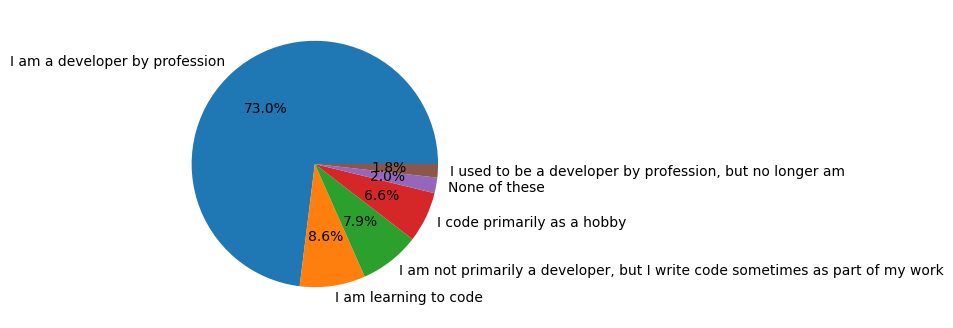

In [42]:
#data to be used for 
MainBranch_data = df["MainBranch"].value_counts()

# create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 4))

#Create pie chart
figure = ax.pie(MainBranch_data, labels=MainBranch_data.index, autopct='%1.1f%%')

How did you learn to code?

In [43]:
learnToCode_data = df["LearnCode"].value_counts()

In [52]:
learnToCode_data.head()

School (i.e., University, College, etc)                                                                                                                                   3669
Other online resources (e.g., videos, blogs, forum)                                                                                                                       3292
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                        2873
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                               2697
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification    2392
Name: LearnCode, dtype: int64

In [50]:
type(learnToCode_data)

pandas.core.series.Series

In [53]:
learnToCode_data.unique()

array([3669, 3292, 2873, 2697, 2392, 2357, 2124, 1936, 1933, 1918, 1907,
       1670, 1580, 1510, 1235, 1120, 1014,  992,  868,  785,  736,  696,
        682,  673,  646,  555,  536,  517,  492,  456,  453,  437,  406,
        396,  354,  351,  350,  343,  336,  328,  318,  317,  315,  314,
        305,  303,  300,  290,  283,  277,  271,  248,  247,  237,  236,
        228,  227,  219,  213,  212,  209,  202,  201,  195,  194,  193,
        190,  189,  188,  186,  184,  182,  171,  167,  165,  163,  162,
        161,  155,  152,  151,  150,  149,  148,  146,  145,  140,  139,
        137,  131,  124,  122,  119,  118,  117,  116,  112,  111,  109,
        108,  106,  101,   99,   97,   95,   92,   91,   90,   88,   86,
         85,   82,   81,   80,   78,   76,   75,   74,   73,   72,   68,
         67,   66,   65,   64,   63,   61,   60,   59,   58,   57,   56,
         55,   54,   53,   52,   51,   50,   49,   47,   46,   45,   44,
         43,   42,   41,   39,   38,   37,   36,   

In [58]:
#Remove if appears fewer than 500 times
filtered_data = learnToCode_data[learnToCode_data >= 500]

In [60]:
filtered_data

School (i.e., University, College, etc)                                                                                                                                             3669
Other online resources (e.g., videos, blogs, forum)                                                                                                                                 3292
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                  2873
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                         2697
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training;Online Courses or Certification              2392
Books / Physical media;Other online resources (e.g., videos, blogs, forum);

Years coding

In [82]:
YearsCode_data = df["YearsCode"].value_counts()

YearsCode_data.sort_index()

1                     1566
10                    5217
11                    1819
12                    2995
13                    1624
14                    1811
15                    2962
16                    1406
17                    1080
18                    1150
19                     563
2                     3351
20                    2659
21                     483
22                    1176
23                     644
24                     752
25                    1582
26                     489
27                     485
28                     425
29                     208
3                     4122
30                    1330
31                     170
32                     371
33                     229
34                     241
35                     742
36                     236
37                     277
38                     288
39                     159
4                     4480
40                     777
41                     143
42                     216
4

In [83]:
YearsCode_data

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [86]:
#Rename the less than 1 year column to zero
YearsCode_data.rename({"Less than 1 year":0}, inplace=True)

In [87]:
YearsCode_data.rename({"More than 50 years":0}, inplace=True)

In [88]:
#Convert series index to integer type
YearsCode_data.index = YearsCode_data.index.astype(int)

In [91]:
figure = px.bar(data_frame=YearsCode_data, 
                x=YearsCode_data.index, 
                y=YearsCode_data.values, 
                labels={'y':'Number of responses', 'x':'Education level'},title="How many years have you coded", 
                color=YearsCode_data.values)

figure.show()

How many years have you coded professionally?

In [92]:
YearsCode_data = df["YearsCodePro"].value_counts()

YearsCode_data.sort_index()

1                     2644
10                    3333
11                    1369
12                    1711
13                     914
14                    1048
15                    1822
16                     921
17                     723
18                     787
19                     380
2                     3945
20                    1472
21                     429
22                     933
23                     463
24                     454
25                     877
26                     320
27                     286
28                     254
29                     126
3                     4261
30                     568
31                     121
32                     223
33                     122
34                     113
35                     266
36                     111
37                     100
38                      96
39                      51
4                     3884
40                     175
41                      42
42                      67
4

In [93]:
#Rename the less than 1 year column to zero
YearsCode_data.rename({"Less than 1 year":0}, inplace=True)

In [94]:
YearsCode_data.rename({"More than 50 years":0}, inplace=True)

In [95]:
#Convert series index to integer type
YearsCode_data.index = YearsCode_data.index.astype(int)

In [96]:
figure = px.bar(data_frame=YearsCode_data, 
                x=YearsCode_data.index, 
                y=YearsCode_data.values, 
                labels={'y':'Number of responses', 'x':'Education level'},title="How many years have you coded", 
                color=YearsCode_data.values)

figure.show()

Developer type

In [98]:
df["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

In [104]:
profession_sum = dict()

for professions in df['DevType']:
    try:
        professions = professions.replace(';', ',')
        profession = professions.split(',')
        for x in profession:
            profession_sum[x] = profession_sum.get(x, 0) + 1
    except:
        continue

In [105]:
profession_sum

{'Data scientist or machine learning specialist': 3424,
 'Developer': 97247,
 ' front-end': 15915,
 'Engineer': 5547,
 ' data': 3600,
 ' site reliability': 1947,
 ' full-stack': 28701,
 ' back-end': 26595,
 ' desktop or enterprise applications': 9546,
 ' QA or test': 3096,
 'Student': 5595,
 ' mobile': 7634,
 'Educator': 2090,
 'Engineering manager': 3574,
 'Database administrator': 4934,
 'Academic researcher': 2709,
 'DevOps specialist': 6170,
 'Other (please specify):': 2618,
 ' embedded applications or devices': 3923,
 ' game or graphics': 1837,
 'Project manager': 3897,
 'Cloud infrastructure engineer': 5283,
 'Data or business analyst': 3201,
 'Designer': 3764,
 'Scientist': 1762,
 'Product manager': 2514,
 'Senior Executive (C-Suite': 1805,
 ' VP': 1805,
 ' etc.)': 1805,
 'System administrator': 4908,
 'Blockchain': 1302,
 'Marketing or sales professional': 518,
 'Security professional': 1928}

In [112]:
profession_final = pd.Series(profession_sum).sort_values()

#Remove developer (everyone is a deverlop of some sort)
profession_final.drop("Developer", inplace=True)

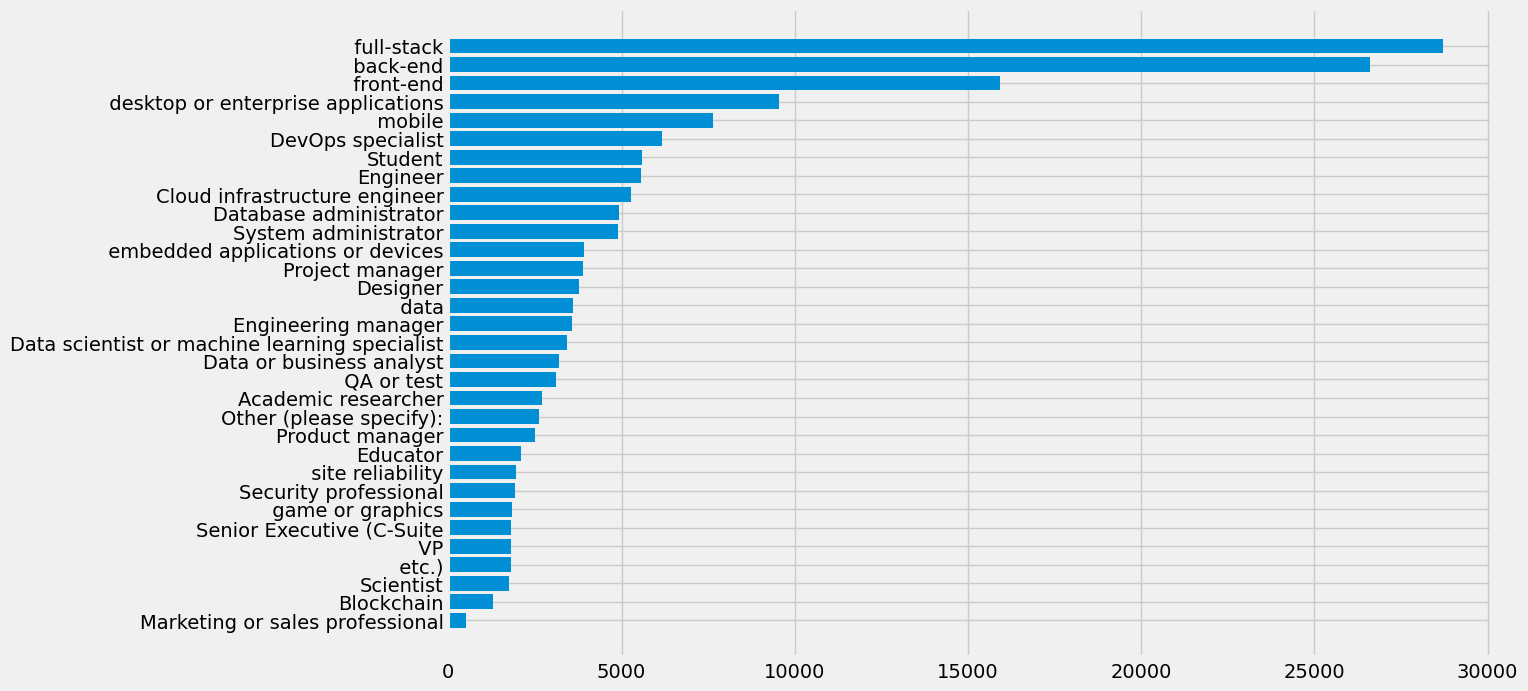

In [113]:
plt.figure(figsize=(12, 8))
plt.barh(profession_final.index, profession_final.values)
plt.show()

Age

In [116]:
age = df["Age"].value_counts()

In [117]:
age

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

In [119]:
age.drop("Prefer not to say", inplace=True)

In [122]:
figure = px.bar(data_frame=age, 
                x=age.index, 
                y=age.values, 
                labels={'y':'Number of responses', 'x':'Age'},
                title="How old are you?")

figure.show()

Gender

In [123]:
gender = df["Gender"].value_counts()

In [124]:
gender.head()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [130]:
gender = gender[["Man","Woman","Non-binary, genderqueer, or gender non-conforming"]]

In [131]:
gender

Man                                                  64607
Woman                                                 3399
Non-binary, genderqueer, or gender non-conforming      704
Name: Gender, dtype: int64

In [137]:
gender.replace({"Non-binary, genderqueer, or gender non-conforming":"Non-binary"}, inplace=True)

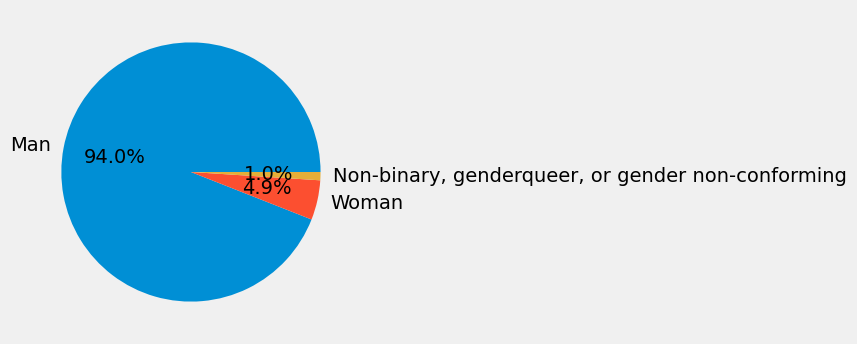

In [140]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 4))

#Create pie chart
figure = ax.pie(gender, labels=gender.index, autopct='%1.1f%%')